In [1]:
import numpy as np
import six
import albumentations as A
import numpy as np
import cv2
from skimage.transform import AffineTransform, warp
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
from loader import LoadDataset
from transf import * 
from torch.utils.data.dataloader import DataLoader
import torch
# already included into loader

import sys
sys.path.append('/home/jbonato/Documents/cvpr_clvision_challenge/')
from core50.dataset import CORE50
dataset = CORE50(root='/home/jbonato/Documents/cvpr_clvision_challenge/core50/data/', scenario='ni',preload=True)


Loading data...
Loading paths...
Loading LUP...
Loading labels...
preparing CL benchmark...


In [2]:
# _,labels,_ = dataset.next()
# a,b = np.unique(labels,return_counts=True)
# plt.scatter(a,b)
test =  dataset.get_full_valid_set(reduced=False)
data = test[0][0][0]
labels = test[0][0][1]

In [3]:
data_test.shape

NameError: name 'data_test' is not defined

In [23]:
a,b = np.unique(labels_test,True)

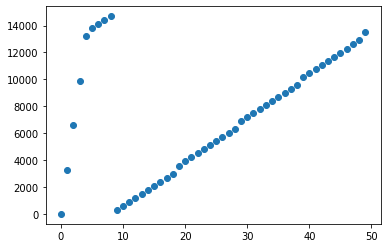

In [26]:
plt.scatter(a,b)

In [3]:
import numpy
import six
import torch
from torch.utils.data.dataset import Dataset
#import albumentations as A
import numpy as np
#import cv2
#from skimage.transform import AffineTransform, warp
import numpy as np
#import pandas as pd
import gc

class DatasetMixin(Dataset):

    def __init__(self, transform=None):
        self.transform = transform
       

    def __getitem__(self, index):
        """Returns an example or a sequence of examples."""
        if torch.is_tensor(index):
            index = index.tolist()
        if isinstance(index, slice):
            current, stop, step = index.indices(len(self))
            return [self.get_example_wrapper(i) for i in
                    six.moves.range(current, stop, step)]
        elif isinstance(index, list) or isinstance(index, numpy.ndarray):
            return [self.get_example_wrapper(i) for i in index]
        else:
            return self.get_example_wrapper(index)

    def __len__(self):
        """Returns the number of data points."""
        raise NotImplementedError

    def get_example_wrapper(self, i):
        """Wrapper of `get_example`, to apply `transform` if necessary"""
        example = self.get_example(i)
        id_ = np.random.choice(np.arange(self.__len__()),1)
        example2 = self.get_example(id_[0])
        if self.transform:
            example = self.transform(example,example2)
   
        return example

    def get_example(self, i):
        """Returns the i-th example.

        Implementations should override it. It should raise :class:`IndexError`
        if the index is invalid.

        Args:
            i (int): The index of the example.

        Returns:
            The i-th example.

        """
        raise NotImplementedError

class LoadDataset(DatasetMixin):
    def __init__(self, images, labels=None, transform=None, indices=None):
        super(LoadDataset, self).__init__(transform=transform)
        self.images = images
        self.labels = labels
        if indices is None:
            indices = np.arange(len(images))
        self.indices = indices
        self.train = labels is not None

    def __len__(self):
        """return length of this dataset"""
        return len(self.indices)

    def get_example(self, i):
        """Return i-th data"""
        i = self.indices[i]
        x = self.images[i]
        
        # scale to [0,1] interval
        x = x/255
        
        # normalize
        x[ :, :, 0] = ((x[ :, :, 0] - 0.485) / 0.229)
        x[ :, :, 1] = ((x[ :, :, 1] - 0.456) / 0.224)
        x[ :, :, 2] = ((x[ :, :, 2] - 0.406) / 0.225)
        
        # Swap channel dimension to fit the caffe format (c, w, h)
        x = np.transpose(x, (2, 0, 1))        
        if self.train:
            y = self.labels[i]
            return x, y
        else:
            return x
        
class Transform:
    def __init__(self, affine=0., train=True,blur_ratio=0., cutout_ratio=0.,ssr_ratio=0.,flip=0.):
        
        self.affine = affine
        self.train = train
        self.cutout_ratio = cutout_ratio
        self.ssr_ratio = ssr_ratio
        self.flip=flip
        #print('wwwwwwwwwww')
    def __call__(self, example,example2):
        if self.train:
            x, y = example
            x2,_ = example2
            
            print(x.shape,y)
        else:
            x = example
            
        #x = np.transpose(x, (1,2,0))
#         #--- Augmentation ---
#         if _evaluate_ratio(self.affine):
#             x = affine_image(x)
        
#         #albumentations...
        
#         else:
#             if _evaluate_ratio(self.cutout_ratio):
#                 #print('w')
#                 x = apply_aug(A.CoarseDropout(max_holes=16, max_height=8, max_width=8, p=1.0), x)

#             if _evaluate_ratio(self.ssr_ratio):
#                 #print('w2')
#                 x = apply_aug(A.ShiftScaleRotate(
#                     shift_limit=0.0625,
#                     scale_limit=0.1,
#                     rotate_limit=180,
#                     p=1.0), x)
                
#             if _evaluate_ratio(self.flip):
#                 #print('w3')
#                 x = np.flip(x,axis=0).copy()
                
#             if _evaluate_ratio(self.flip):
#                 #print('w4')
#                 x = np.flip(x,axis=1).copy()
        #x2 = np.transpose(x2, (1,2,0))
        x = (x+x2)/2
        
        #x = np.transpose(x, (2,0,1)) 
        if self.train:
            y = y.astype(np.int64)
            return x, y
        else:
            return x

In [65]:
tr =Transform(affine=True, train=True,blur_ratio=0.5, cutout_ratio=0.5, ssr_ratio=0.5)
qq,_ =tr.__call__((data[0],labels[700]),(data[400],labels[1]))

(128, 128, 3) 10.0


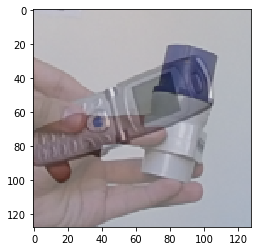

In [58]:
plt.imshow(qq.astype(np.uint64))

In [ ]:
qqq =data[labels==1,:,:,:]
plt.imshow(qqq[10].astype(np.uint64))

In [4]:
dataw,labelsw,qw = dataset.next()

Batch number: 0


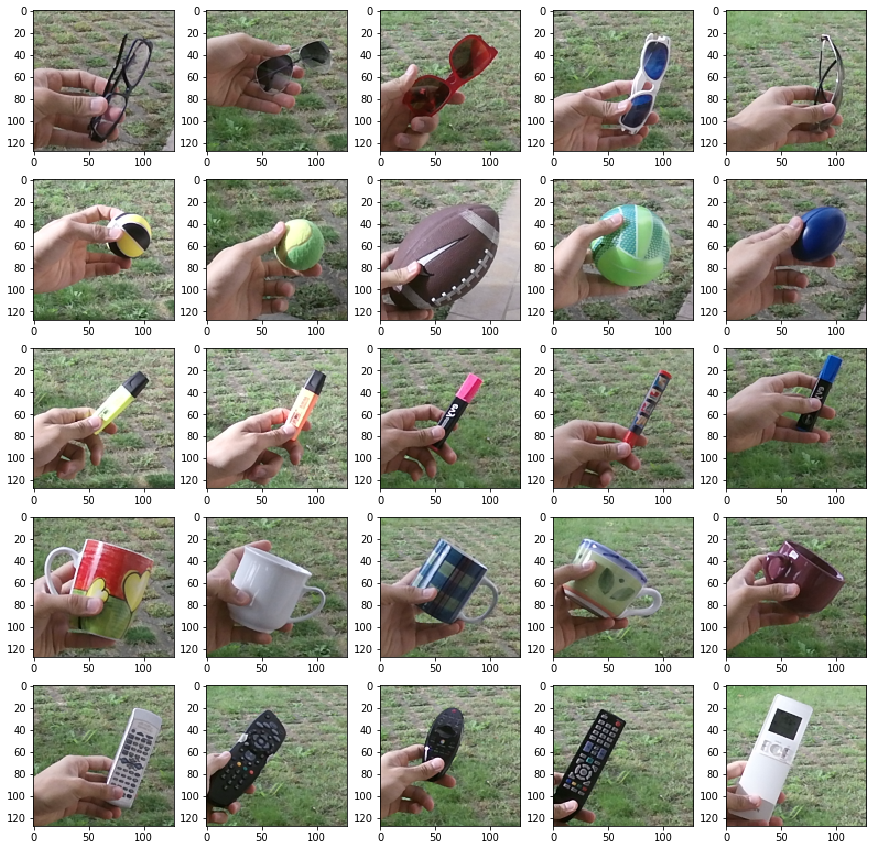

In [90]:
#qqq =dataw[labelsw==1,:,:,:]
#plt.imshow(qqq[40].astype(np.uint64))

k = 1
fig,ax = plt.subplots(figsize=(15,15),ncols=5,nrows=5)
for i in range(25,50):
    qqq =dataw[labelsw==i,:,:,:]
    ax[i//(5)-5,i%(5)].imshow(qqq[0].astype(np.uint8))

In [46]:
tr =Transform(affine=True, train=True,blur_ratio=0.5, cutout_ratio=0.5, ssr_ratio=0.5)
n_dataset= data.shape[0]
debug = False
train_data_size = 800 if debug else int(n_dataset * 0.8)
test_data_size = 10 if debug else int(n_dataset * 0.1)
valid_data_size = 100 if debug else int(n_dataset - train_data_size-test_data_size)


perm = np.random.RandomState(777).permutation(n_dataset)

    
train_set = LoadDataset(data,labels,transform=tr,indices=perm[:train_data_size])
val_set = LoadDataset(data,labels,indices=perm[train_data_size:train_data_size+valid_data_size])
test_set = LoadDataset(data,labels,indices=perm[train_data_size+valid_data_size:train_data_size+valid_data_size+test_data_size])

batch_size=32#64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [10]:
# device = torch.device('cuda:0')
# for inputs, labels in train_loader:
#     print(inputs.size())

In [6]:
import albumentations
qhue = albumentations.augmentations.transforms.HueSaturationValue(hue_shift_limit=30, sat_shift_limit=30, val_shift_limit=20, always_apply=False, p=1)
#crop = albumentations.augmentations.transforms.Crop(x_min=18, y_min=18, x_max=108, y_max=108, always_apply=True, p=1.0)
crop = albumentations.augmentations.transforms.RandomSizedCrop((90,128), 128, 128, w2h_ratio=1.0, interpolation=3, always_apply=False, p=1.0)

In [7]:
def apply_aug(aug, image):
    return aug(image=image)['image']

image = apply_aug(crop,data[20].astype(np.uint8))
image.shape

(128, 128, 3)

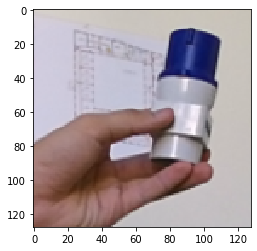

In [8]:
plt.imshow(image)

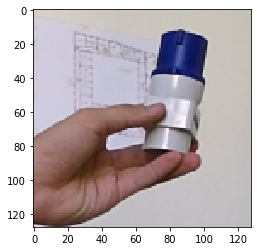

In [10]:
plt.imshow(data[20,:,:].astype(np.uint8))